<center>
    <h1> INF390 - Análisis Inteligente de Datos </h1>
    <h1> Tarea 1 - Visualización y Análisis Descriptivo de Datos con Python </h1>
    <h3>
        <table style="border: 0px;">
            <tr style="border: 0px;">
                <td style="text-align: center; border: 0px;"> Aldo Berrios Valenzuela </td>
                <td style="text-align: center; border: 0px; padding-right: 110px;"> </td>
                <td style="text-align: center; border: 0px;"> Lukas Zamora Jabre </td>
            </tr>
            <tr style="border: 0px;">
                <td style="text-align: center; border: 0px;"> 201304018-7 </td>
                <td style="text-align: center; border: 0px; padding-right: 110px;"> </td>
                <td style="text-align: center; border: 0px;"> 201430047-6 </td>
            </tr>
            <tr style="border: 0px;">
                <td style="text-align: center; font-size: 14px; border: 0px;"> `aldo.berrios.13@sansano.usm.cl` </td>
                <td style="text-align: center; border: 0px; padding-right: 110px;"> </td>
                <td style="text-align: center; font-size: 14px; border: 0px;"> `lukas.zamora.14@sansano.usm.cl` </td>
            </tr>
        </table>
    </h3> 
    <h4> Valparaíso, Viernes 29 de Octubre de 2017 </h4>
</center>

# 1. &nbsp;&nbsp;&nbsp;&nbsp; Preliminares

Para el desarrollo de esta tarea usaremos el dataset que se encuentra en https://archive.ics.uci.edu/ml/datasets/Census+Income. Luego, importamos las librerías que usaremos durante el desarrollo de la tarea:

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as ss
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
%matplotlib inline

A continuación, cargamos el dataset con pandas:

In [2]:
df = pd.DataFrame.from_csv('census_income_dataset.csv')
df = df.reset_index()
df = df.rename(columns={'Capital-gain':'Capital_Gain',
                                                  'Education-Num':'Education_Num',
                                                 'Capital-loss': 'Capital_loss',
                                                 'hours-per-week': 'Hours_per_week',
                                                 'Nartive-country': 'Native_country'})
df.head()


,Age,Workclass,Fnlwgt,Education,Education_Num,Marital Status,Occupation,Relationship,Race,Sex,Capital_Gain,Capital_loss,Hours_per_week,Native_country,Result
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


# 2. &nbsp;&nbsp;&nbsp;&nbsp; Desarrollo de Preguntas

## 2.1. &nbsp;&nbsp;&nbsp; Estudio de Estadística Descriptiva a 2 variables

Para realizar el estudio de estadística descriptiva seleccionaremos dos variables de nuestro dataset. Si bien, no nos imponen un criterio de seleccion de variables numéricas, nosotros elegiremos aquellas que estén mejor relacionadas. Para ello revisaremos la matríz de correlaciones:

In [3]:
df.corr()

,Age,Fnlwgt,Education_Num,Capital_Gain,Capital_loss,Hours_per_week
Age,1.000000,-0.076646,0.036527,0.077674,0.057775,0.068756
Fnlwgt,-0.076646,1.000000,-0.043195,0.000432,-0.010252,-0.018768
Education_Num,0.036527,-0.043195,1.000000,0.122630,0.079923,0.148123
Capital_Gain,0.077674,0.000432,0.122630,1.000000,-0.031615,0.078409
Capital_loss,0.057775,-0.010252,0.079923,-0.031615,1.000000,0.054256
Hours_per_week,0.068756,-0.018768,0.148123,0.078409,0.054256,1.000000


Como podemos observar, no existe mucha relación entre las variables, así que elegiremos aquellas que tienen mayor correlación en comparación con el resto. Es por ello, que escogeremos *Capital_Gain* y *Education_Num* para hacer el análisis (*Education_Num* y *Hours_per_week* tienen una mayor correlación, pero queremos hacer nuestro análisis en base a esas dos variables).

### 2.1.1. &nbsp;&nbsp; Capital Gain

Comenzamos analizando los principales estadísticos de la variable:

In [4]:
df["Capital_Gain"].describe()

count    32561.000000
mean      1077.648844
std       7385.292085
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      99999.000000
Name: Capital_Gain, dtype: float64

Analizando la información anterior notamos que al menos el 75% de los datos es cero, es por ello, que sin necesidad de graficar la distribución de los datos vemos que *Capital_Gain* está sesgada hacia la derecha, es decir, es una distribución asimétrica. Cuando lleguemos a la sección de los gráficos confirmaremos esta hipótesis.

Como podemos observar, el método `describe()` no nos entregó la moda, así que la calculamos:

In [19]:
df['Capital_Gain'].mode()

0    0
dtype: int64

De lo anterior, se tiene que la moda es cero, y esto era bastante esperable ya que la mediana (2 cuartil) también es 0. Luego, si todos los datos de *Capital_Gain* son positivos la moda tiene que ser $0$. Posteriormente, para averiguar qué tan significativa es la moda obtendremos la tasa de variación de la muestra:

In [36]:
moda_values = df[df['Capital_Gain'] == 0]['Capital_Gain'].count()
fm = moda_values / df['Capital_Gain'].count()
tasa_variacion = 1 - fm
print (tasa_variacion)

0.0832898252511


Como podemos observar, la tasa de variación $V$ es cercana a cero, por lo tanto, la moda es muy significativa.

Si bien, tenemos una varianza de $7385.292085$ esto no nos dice mucho acerca de qué tan concentrados los datos están en $0$. Es por ello, que obtendremos el coeficiente de apuntamiento para dar respuesta a esta pregunta:

In [22]:
df['Capital_Gain'].kurtosis()

154.79943785425334

Debido a que la curtosis $g_2 \gg 0$ se tiene que existe una gran concentración de los datos respecto al promedio de la muestra, es decir, la mayoría de los datos están concentrados en $0$.

Finalmente, la siguiente tabla resume todo el análisis descriptivo realizado anteriormente:

| Estadístico               | Valor           | Comentario                               |
| ------------------------- | ---------------: | ---------------------------------------- |
| Total de ocurrencias      | 32561           |                                          |
| Media                     | 1077            |                                          |
| Moda                      | 0               |                                          |
| Tasa de variación         | 0.0832898252511 | La moda es muy significativa             |
| Desviación Estándar       | 7385.292085     |                                          |
| Curtosis                  | 154.7994378542  | Existe una gran cantidad de datos en la vecindad de la media. |
| Mínimo                    | 0               |                                          |
| Máximo                    | 99999           |                                          |
| Primer Cuartil            | 0               |                                          |
| Segundo Cuartil o Mediana | 0               |                                          |
| Tercer Cuartil            | 0               |                                          |

### 2.1.2. &nbsp;&nbsp; Education Num

De la misma forma que lo hicimos con *Capital_Gain*, analizaremos los principales estadísticos de esta variable aleatoria:

In [24]:
df['Education_Num'].describe()

count    32561.000000
mean        10.080679
std          2.572720
min          1.000000
25%          9.000000
50%         10.000000
75%         12.000000
max         16.000000
Name: Education_Num, dtype: float64

Como podemos observar, la mayoría de los encuestados tiene un grado (al menos sobre el 50%) no alcanza a superar un nivel de educación sobre 10. Por otro lado, la desviación estándar tiene un valor de $2.572720 \approx 2.57$, lo que nos dice que se espera que si tomamos un encuestado al azar, se espere que este tenga un *Educacion_Num* entre $7.51$ y $12.65$.

Veamos que pasa con la moda y la tasa de variación:

In [47]:
education_num_mode = df['Education_Num'].mode()
print ("Moda de Education_Num: " + str(education_num_mode.values[0]))

moda_values = df[df['Education_Num'] == education_num_mode.values[0]]['Education_Num'].count()
fm = moda_values / df['Education_Num'].count()
tasa_variacion = 1 - fm
print ("Tasa de Variacion de: " + str(tasa_variacion))

Moda de Education_Num: 9
Tasa de Variacion de: 0.677497619852


El código anterior arroja que la moda de *Education_Num* es $9$ y la tasa de variación es de $V=0.67$. Debido a que $V\gg 0$ se tiene que la moda no es muy representativa, es decir, que la ocurrencia de personas con un *Education_Num* no supera con creces a otras con un *Education_Num* diferente. Esto lo podemos comprobar a través de una tabla de frecuencias:

In [49]:
df['Education_Num'].value_counts()

9     10501
10     7291
13     5355
14     1723
11     1382
7      1175
12     1067
6       933
4       646
15      576
5       514
8       433
16      413
3       333
2       168
1        51
Name: Education_Num, dtype: int64

Como podemos ver, efectivamente la moda no es muy significativa.

Lo último que nos falta es obtener la curtosis del caso:

In [51]:
df['Education_Num'].kurtosis()

0.62344407476292485

Debido a que la curtosis $g_2 > 0$, se tiene que los datos tienden a concentrarse respecto a la media, pero no en grandes cantidades como ocurrió con *Capital_Gain*.

Finalmente, resumimos el análisis descriptivo realizado con anterioridad a *Education_Num* a través de la siguiente tabla:

| Estadístico               |    Valor | Comentario                               |
| ------------------------- | -------: | ---------------------------------------- |
| Total de ocurrencias      |    32561 |                                          |
| Media                     | 10.08067 |                                          |
| Moda                      |        9 |                                          |
| Tasa de variación         |  0.67749 | La moda es no es muy significativa.      |
| Desviación Estándar       |  2.57272 |                                          |
| Curtosis                  |  0.62344 | Existe una cantidad poco considerable dentro de la media. |
| Mínimo                    |        1 |                                          |
| Máximo                    |       16 |                                          |
| Primer Cuartil            |        9 |                                          |
| Segundo Cuartil o Mediana |       10 |                                          |
| Tercer Cuartil            |       12 |                                           |

<h1 style="color: red"> OLD </h3>

Primero realizaremos un gráfico de dispersión de datos con sus respectivos histogramas marginales:

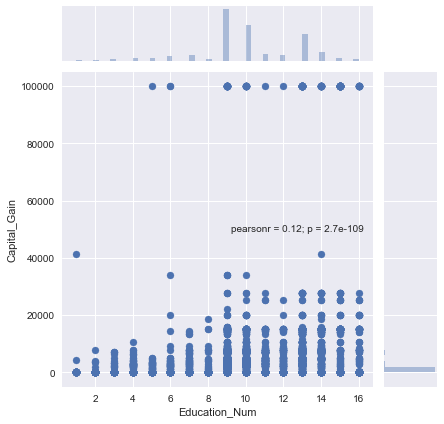

In [6]:
sns.jointplot(x="Education_Num", y="Capital_Gain", data=df)

Notamos que la variable *Capital Gain* posee una gran cantidad de ceros mientras que la variable *Education_Num* está mucho más distribuida. 

A continuación analizaremos ambas variables por separado para luego analizarlas de manera cojunta:

### Capital Gain

Comenzamos analizando los principales estadísticos de la variable:

In [7]:
df["Capital_Gain"].describe()

count    32561.000000
mean      1077.648844
std       7385.292085
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      99999.000000
Name: Capital_Gain, dtype: float64

Analizando la información anterior notamos que al menos el 75% de los datos es cero. Surge la duda de cuantos datos no son ceros pregunta que resolvemos a continuación:

In [8]:
df_capital_gain_not_zero = df[df["Capital_Gain"] > 0.0]
print (df_capital_gain_not_zero.shape[0])
print((df_capital_gain_not_zero.shape[0]/df.shape[0])*100)

2712
8.328982525106724


El dato anterior nos dice que 2712 encuestados poseen ganancias de capital osea tan sólo el 8% de la muestra. 

Sabemos que el 92% de los encuestados no posee ganancias de capital externos a su sueldo. Sin embargo podemos analizar al 8% restante. Lo primero que haremos será calcular su KDE:

/anaconda/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


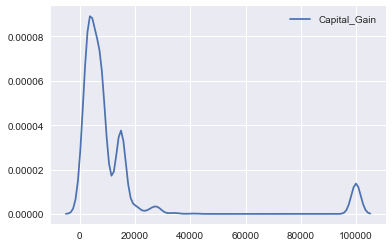

In [9]:
sns.kdeplot(df_capital_gain_not_zero["Capital_Gain"])


Por otro lado podemos analizar la distribución del capital ganado según: 

#### Ocupación

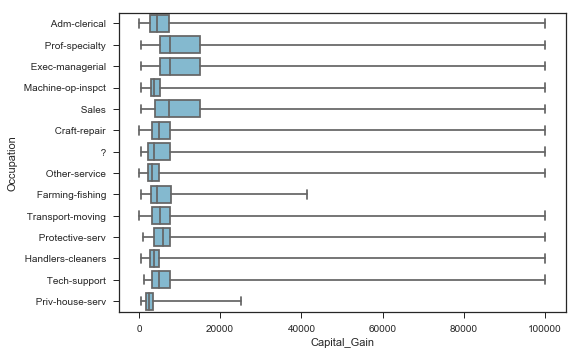

In [10]:
sns.set(style="ticks", palette="muted", color_codes=True)
ax = sns.boxplot(x="Capital_Gain", y="Occupation", data=df_capital_gain_not_zero, whis=np.inf, color="c")

#### Workclass

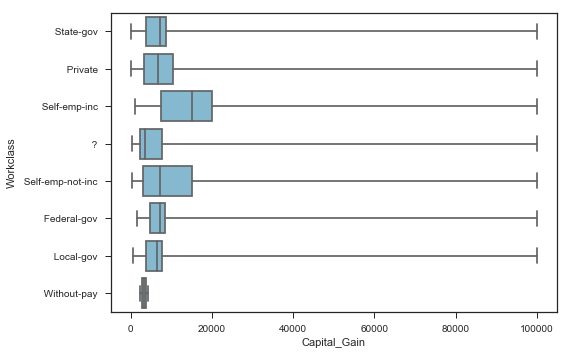

In [11]:
sns.set(style="ticks", palette="muted", color_codes=True)
ax = sns.boxplot(x="Capital_Gain", y="Workclass", data=df_capital_gain_not_zero, whis=np.inf, color="c")

#### Education

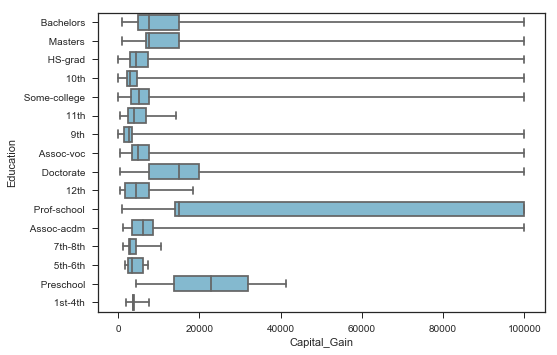

In [12]:
sns.set(style="ticks", palette="muted", color_codes=True)
ax = sns.boxplot(x="Capital_Gain", y="Education", data=df_capital_gain_not_zero, whis=np.inf, color="c")

De los gráficos anteriores se pueden desprender los grupos por categorías que poseen ganancias de capital. Además notamos que la varianza de los datos seleccionados(datos distintos a cero) es gigante con respecto a los datos tolerados por cada uno de los boxplot. Esto se debe a la presencia de outliers dentro de la submuestra. A continuación se calcula la varianza de los datos contando los ceros y sin contarlos:

In [13]:
df_capital_gain_not_zero["Capital_Gain"].var()

501554547.1757241

In [14]:
df["Capital_Gain"].var()

54542539.17839

Claramente la varianza de los datos con ceros es menor debido a que casi el 92% de la muestra es cero.

### Education Num